<a href="https://colab.research.google.com/github/sohaib-khan0/cs351-ai-lab-2022551/blob/main/Lab6_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

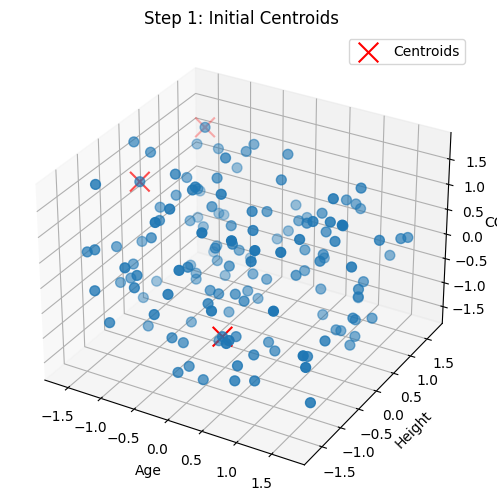

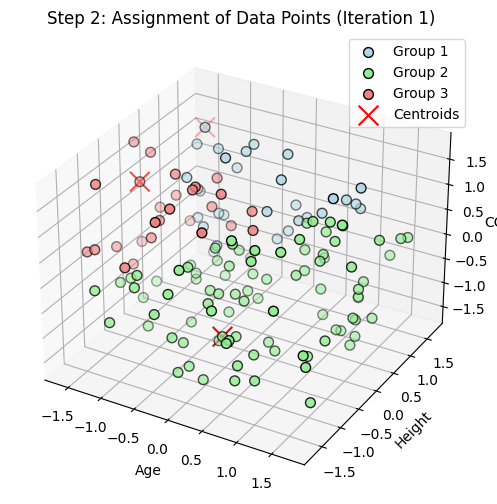

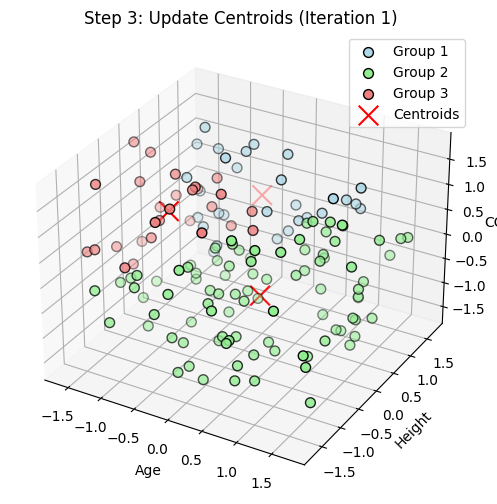

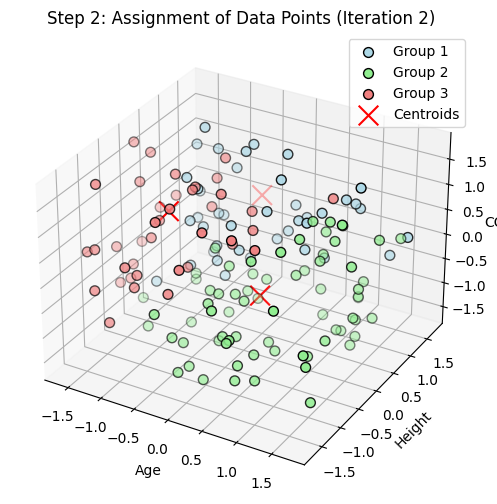

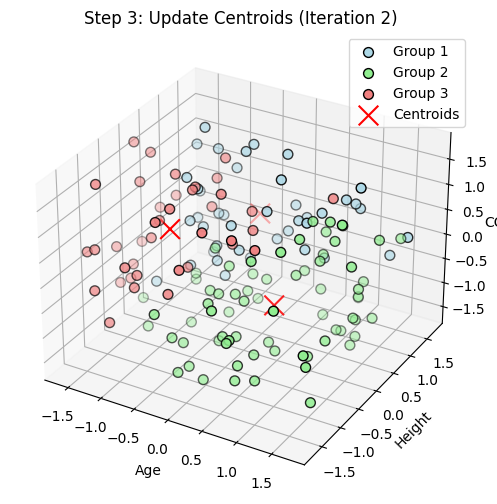

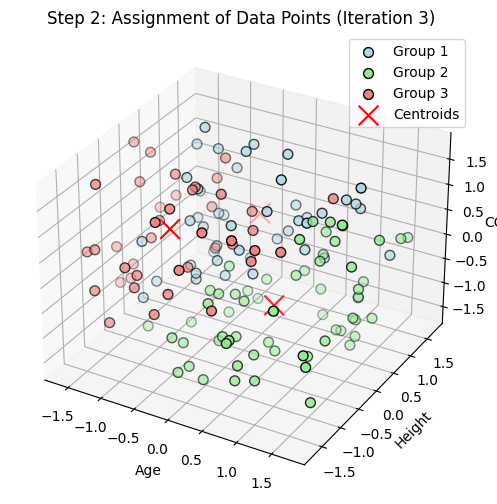

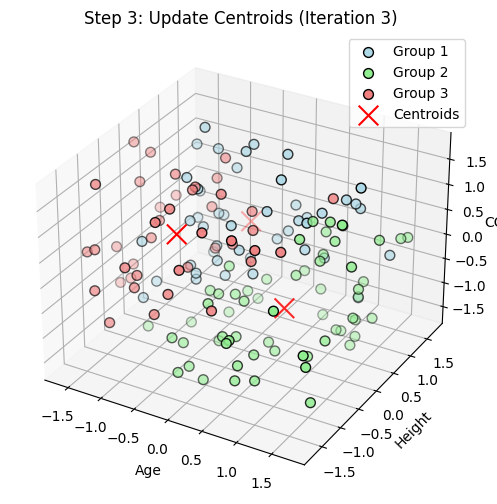

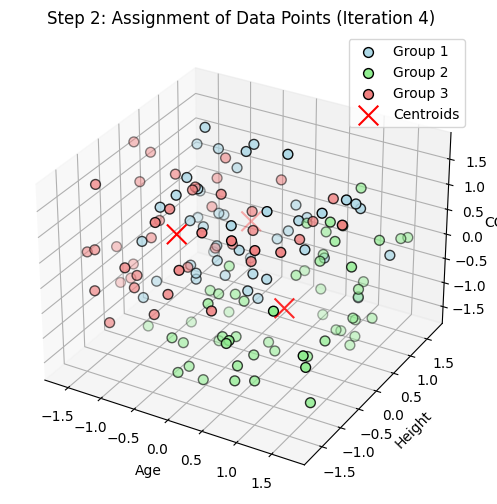

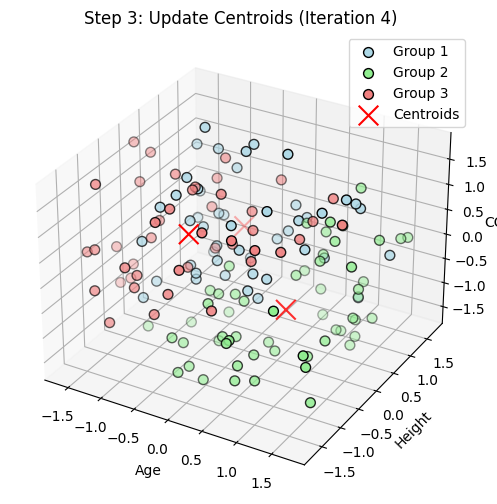

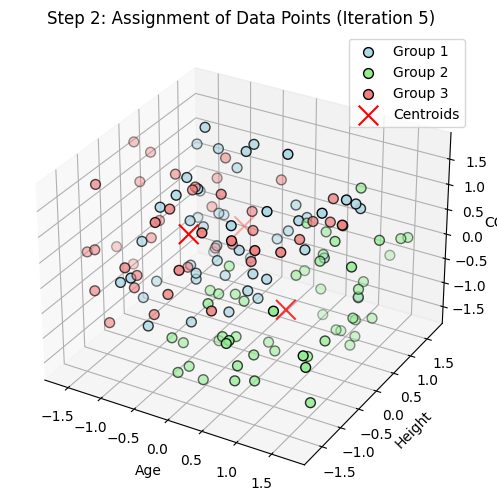

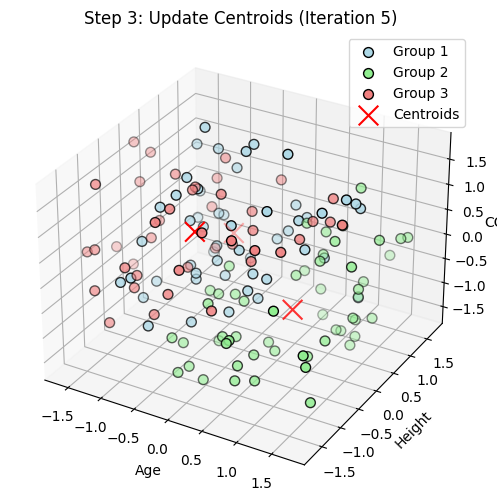

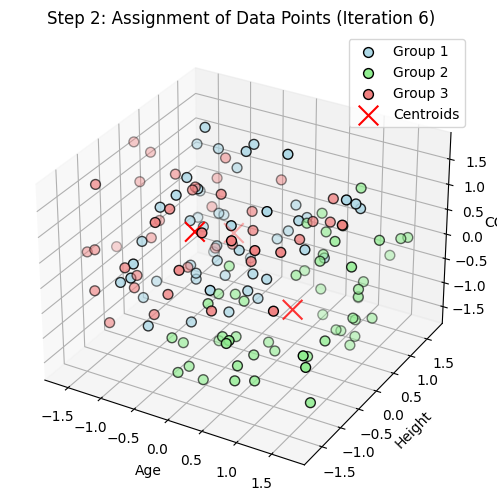

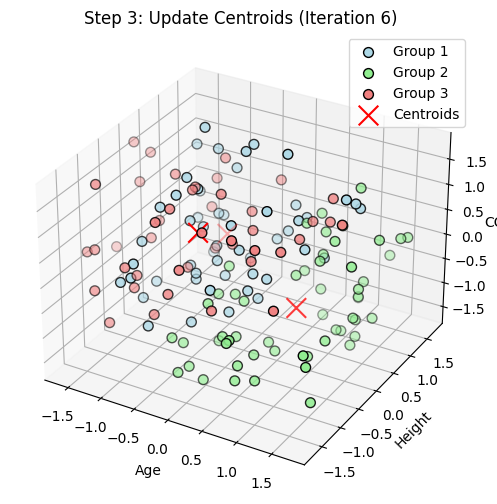

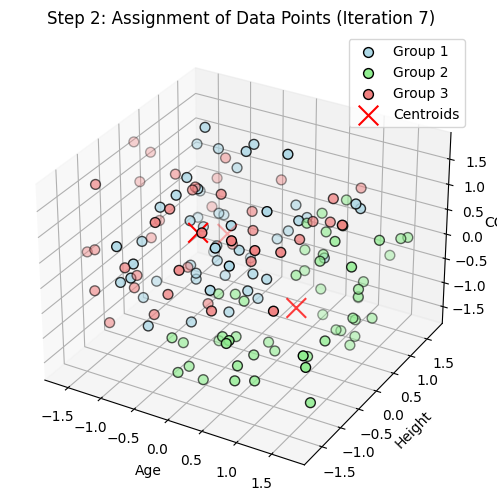

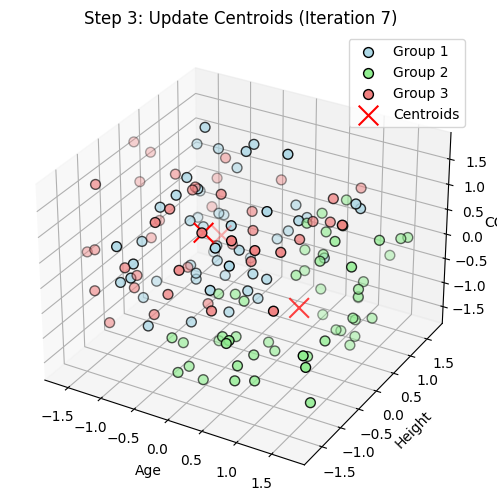

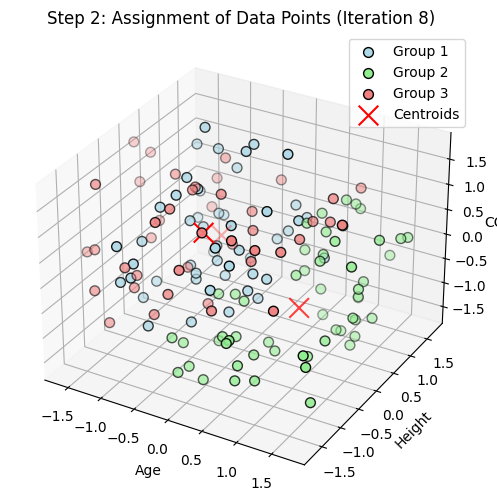

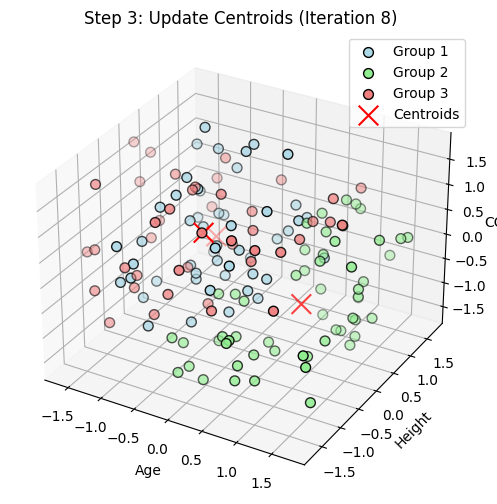

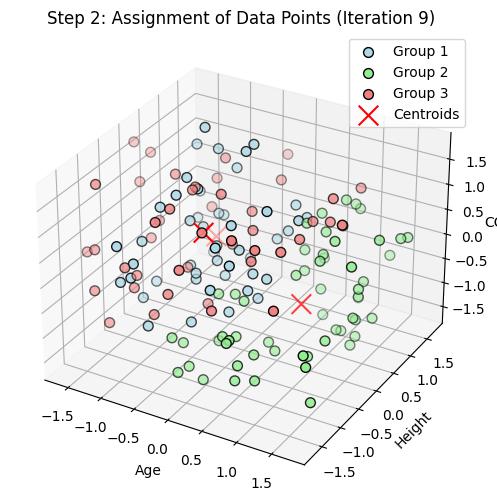

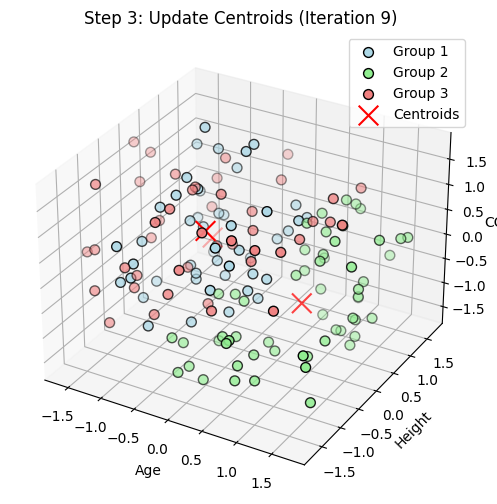

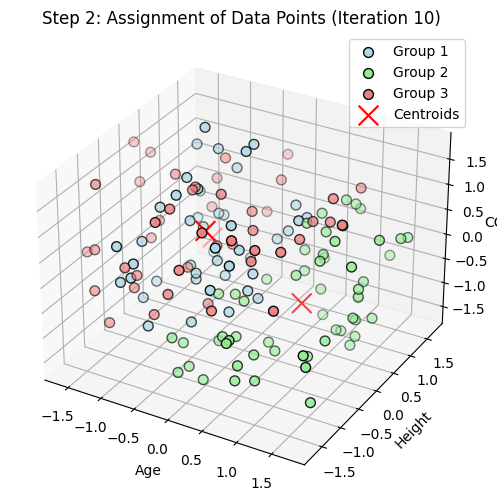

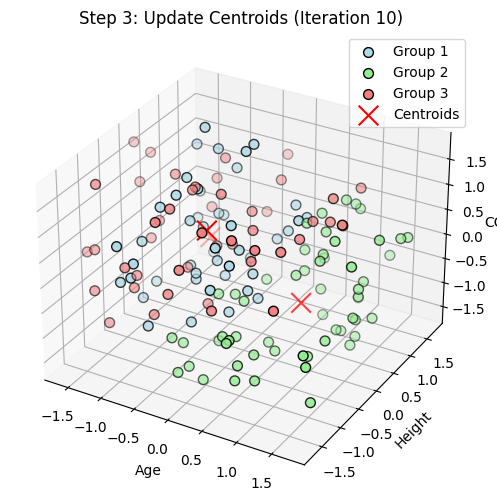

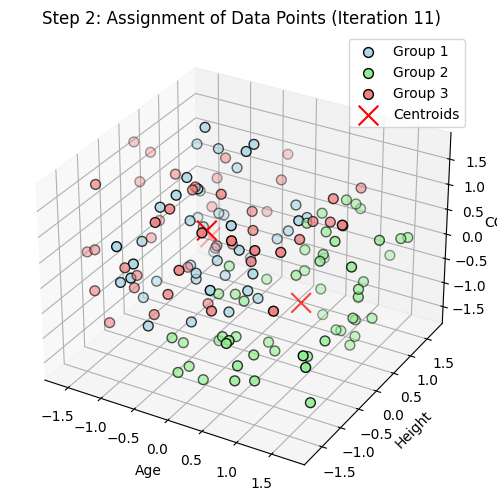

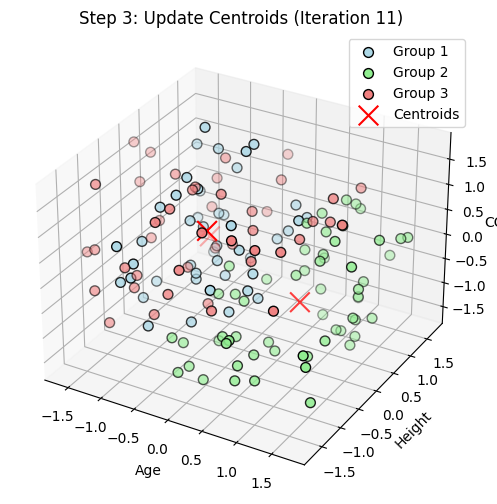

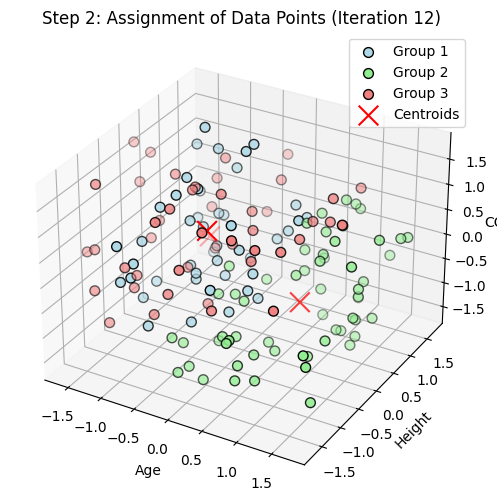

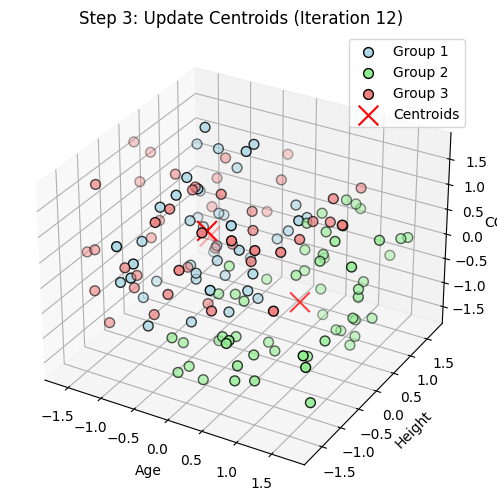

In [1]:
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.preprocessing import StandardScaler  # For feature scaling
from mpl_toolkits.mplot3d import Axes3D  # For 3D visualization

# Create a synthetic dataset with Age, Height, and CGPA features
np.random.seed(42)  # Seed for reproducibility
n_samples = 150

# Generating random data for Age, Height, and CGPA
Age = np.random.randint(18, 35, size=n_samples)  # Random ages between 18 and 35
Height = np.random.randint(150, 200, size=n_samples)  # Random heights between 150 and 200 cm
CGPA = np.random.uniform(2.0, 4.0, size=n_samples)  # Random CGPA between 2.0 and 4.0

# Combine them into a single dataset
X = np.column_stack((Age, Height, CGPA))

# Standardize the features to ensure all features have the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to calculate the Euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to implement k-Means Clustering with step-by-step visualizations
def kmeans(X, k, max_iterations=100, tol=1e-4):
    np.random.seed(42)  # Seed for reproducibility
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]  # Step 1: Initialize centroids
    visualize_step(X, centroids, None, title="Step 1: Initial Centroids")  # Visualize initial centroids

    for iteration in range(max_iterations):
        # Step 2: Assign each data point to the closest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        visualize_step(X, centroids, labels, title=f"Step 2: Assignment of Data Points (Iteration {iteration + 1})")

        # Step 3: Calculate new centroids based on mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        visualize_step(X, new_centroids, labels, title=f"Step 3: Update Centroids (Iteration {iteration + 1})")

        # If centroids do not change significantly, break the loop (algorithm converged)
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break

        # Update centroids for the next iteration
        centroids = new_centroids

    return centroids, labels

# Function to visualize clustering process at each step, with custom class names and feature labels
def visualize_step(X, centroids, labels=None, title="Clustering Step"):
    plt.figure(figsize=(8, 6))

    # Create a dictionary for class names and their corresponding colors
    class_names = {0: 'Group 1', 1: 'Group 2', 2: 'Group 3'}
    colors = ['lightblue', 'lightgreen', 'lightcoral']

    # 3D visualization if 3 features are used
    if X.shape[1] == 3:
        ax = plt.axes(projection='3d')
        ax.set_xlabel('Age')
        ax.set_ylabel('Height')
        ax.set_zlabel('CGPA')
        if labels is not None:
            for class_label in np.unique(labels):
                ax.scatter(X[labels == class_label, 0], X[labels == class_label, 1], X[labels == class_label, 2],
                           label=class_names[class_label], s=50, edgecolor='k', color=colors[class_label])
        else:
            ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=50)
        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], color='red', marker='x', s=200, label='Centroids')
    else:
        # 2D visualization if only two features are used
        if labels is not None:
            for class_label in np.unique(labels):
                plt.scatter(X[labels == class_label, 0], X[labels == class_label, 1],
                            label=class_names[class_label], s=50, edgecolor='k', color=colors[class_label])
        else:
            plt.scatter(X[:, 0], X[:, 1], s=50)
        plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')

    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Set the number of clusters (k)
k = 3  # We are setting 3 clusters

# Run the k-Means algorithm with visualizations for each step
centroids, labels = kmeans(X_scaled, k)


Lab6
/K-Means Clustering